In [1]:
import numpy as np
import pandas as pd
import requests

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Circle
from matplotlib.animation import FuncAnimation
from matplotlib.animation import writers
from matplotlib.animation import FFMpegWriter

### A function to extract the base url and parameters from the URL

In [2]:
def get_base_params(url):
    idx = url.index('?')
    base = url[:idx]
    params = url[idx + 1:]
    params_dict = dict([param.split('=') for param in params.split('&')])
    return base, params_dict

In [3]:
url = '''https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=0021501228&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2015-16&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='''

In [4]:
base_url, params_dict = get_base_params(url)

In [5]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}

In [6]:
idx = url.index('?')
idx

43

In [7]:
params = url[idx + 1:]

In [8]:
params

'AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=0021501228&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2015-16&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='

In [9]:
req = requests.get(base_url, params=params, headers=headers)

In [10]:
json_data = req.json()
json_data.keys()

dict_keys(['resource', 'parameters', 'resultSets'])

In [11]:
result = json_data['resultSets'][0]
result.keys()

dict_keys(['name', 'headers', 'rowSet'])

### Get the data and store in a dataframe

In [12]:
pd.options.display.max_columns = 20

columns = result['headers']
data = result['rowSet']
df_shots = pd.DataFrame(data=data, columns=columns)

In [13]:
df_shots.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021501228,2,202330,Gordon Hayward,1610612762,Utah Jazz,1,11,40,...,Center(C),Less Than 8 ft.,1,-17,7,1,0,20160413,LAL,UTA
1,Shot Chart Detail,0021501228,5,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,11,25,...,Right Side Center(RC),24+ ft.,24,137,203,1,0,20160413,LAL,UTA
2,Shot Chart Detail,0021501228,8,203918,Rodney Hood,1610612762,Utah Jazz,1,11,12,...,Center(C),8-16 ft.,8,-11,82,1,0,20160413,LAL,UTA
3,Shot Chart Detail,0021501228,10,203481,Jeff Withey,1610612762,Utah Jazz,1,10,59,...,Center(C),Less Than 8 ft.,6,-43,46,1,1,20160413,LAL,UTA
4,Shot Chart Detail,0021501228,11,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,10,44,...,Right Side(R),16-24 ft.,19,199,11,1,0,20160413,LAL,UTA


In [14]:
df_shots['SHOT_TYPE'].value_counts()

2PT Field Goal    113
3PT Field Goal     55
Name: SHOT_TYPE, dtype: int64

### Get the play by play data

In [15]:
play_by_play_url = '''https://stats.nba.com/stats/playbyplayv2?\
EndPeriod=10&EndRange=55800&GameID=0021501228&RangeType=2&Season=2015-16&\
SeasonType=Regular+Season&StartPeriod=1&StartRange=0'''

In [16]:
playbyplay_base_url, playbyplay_params = get_base_params(play_by_play_url)

In [17]:
playbyplay_base_url

'https://stats.nba.com/stats/playbyplayv2'

In [18]:
playbyplay_params

{'EndPeriod': '10',
 'EndRange': '55800',
 'GameID': '0021501228',
 'RangeType': '2',
 'Season': '2015-16',
 'SeasonType': 'Regular+Season',
 'StartPeriod': '1',
 'StartRange': '0'}

In [19]:
r = requests.get(playbyplay_base_url, params=playbyplay_params, headers=headers)
playbyplay_json_data = r.json()
playbyplay_json_data.keys()

dict_keys(['resource', 'parameters', 'resultSets'])

In [20]:
playbyplay_results = playbyplay_json_data['resultSets'][0]
playbyplay_results.keys()

dict_keys(['name', 'headers', 'rowSet'])

In [21]:
playbyplay_data = playbyplay_results['rowSet']
playbyplay_columns = playbyplay_results['headers']
df_playbyplay = pd.DataFrame(data=playbyplay_data, columns=playbyplay_columns)
df_playbyplay.head()

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,0021501228,0,12,0,1,10:49 PM,12:00,None,None,None,...,None,None,0,0,None,NaN,None,None,None,0
1,0021501228,1,10,0,1,10:49 PM,12:00,Jump Ball Hibbert vs. Withey: Tip to Lyles,None,None,...,Jazz,UTA,5,1626168,Trey Lyles,1.610613e+09,Utah,Jazz,UTA,0
2,0021501228,2,2,5,1,10:49 PM,11:40,None,None,MISS Hayward 2' Layup,...,None,None,0,0,None,NaN,None,None,None,0
3,0021501228,3,4,0,1,10:49 PM,11:39,Randle REBOUND (Off:0 Def:1),None,None,...,None,None,0,0,None,NaN,None,None,None,0
4,0021501228,5,2,1,1,10:50 PM,11:25,MISS Bryant 24' 3PT Jump Shot,None,None,...,None,None,0,0,None,NaN,None,None,None,0


### Get the Free Throws data and create a dataframe

In [22]:
df_ft = df_playbyplay[df_playbyplay['EVENTMSGTYPE'] == 3]
df_ft.head()

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
57,0021501228,63,3,11,1,11:00 PM,4:57,None,None,Withey Free Throw 1 of 2 (3 PTS),...,None,None,0,0,None,NaN,None,None,None,0
59,0021501228,66,3,12,1,11:01 PM,4:57,None,None,MISS Withey Free Throw 2 of 2,...,None,None,0,0,None,NaN,None,None,None,0
68,0021501228,76,3,10,1,11:02 PM,4:14,Bryant Free Throw 1 of 1 (7 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,0
88,0021501228,100,3,13,1,11:08 PM,1:47,Bryant Free Throw 1 of 3 (13 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,0
89,0021501228,102,3,14,1,11:08 PM,1:47,Bryant Free Throw 2 of 3 (14 PTS),None,None,...,None,None,0,0,None,NaN,None,None,None,0


In [23]:
df_ft['PLAYER1_TEAM_ID'] = df_ft['PLAYER1_TEAM_ID'].astype('int')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Merge 2P and 3P dataframe with FT dataframe

In [24]:
cols = ['GAME_EVENT_ID', 'PLAYER_NAME', 'PLAYER_ID', 'TEAM_NAME', 'TEAM_ID', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'SHOT_TYPE', 'LOC_X', 'LOC_Y', 'SHOT_MADE_FLAG']

df_shots2 = df_shots[cols]
df_shots2.head()

,GAME_EVENT_ID,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_TYPE,LOC_X,LOC_Y,SHOT_MADE_FLAG
0,2,Gordon Hayward,202330,Utah Jazz,1610612762,1,11,40,2PT Field Goal,-17,7,0
1,5,Kobe Bryant,977,Los Angeles Lakers,1610612747,1,11,25,3PT Field Goal,137,203,0
2,8,Rodney Hood,203918,Utah Jazz,1610612762,1,11,12,2PT Field Goal,-11,82,0
3,10,Jeff Withey,203481,Utah Jazz,1610612762,1,10,59,2PT Field Goal,-43,46,1
4,11,Kobe Bryant,977,Los Angeles Lakers,1610612747,1,10,44,2PT Field Goal,199,11,0


In [25]:
df_ft.columns

Index(['GAME_ID', 'EVENTNUM', 'EVENTMSGTYPE', 'EVENTMSGACTIONTYPE', 'PERIOD',
       'WCTIMESTRING', 'PCTIMESTRING', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION',
       'VISITORDESCRIPTION', 'SCORE', 'SCOREMARGIN', 'PERSON1TYPE',
       'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_NICKNAME', 'PLAYER1_TEAM_ABBREVIATION', 'PERSON2TYPE',
       'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_NICKNAME', 'PLAYER2_TEAM_ABBREVIATION', 'PERSON3TYPE',
       'PLAYER3_ID', 'PLAYER3_NAME', 'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_NICKNAME', 'PLAYER3_TEAM_ABBREVIATION',
       'VIDEO_AVAILABLE_FLAG'],
      dtype='object')

In [26]:
ft_cols = ['EVENTNUM', 'PERIOD', 'PCTIMESTRING', 'SCORE', 'PLAYER1_NAME', 'PLAYER1_ID',
           'PLAYER1_TEAM_CITY', 'PLAYER1_TEAM_NICKNAME', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_ABBREVIATION']

df_ft2 = df_ft[ft_cols]
df_ft2.head()

,EVENTNUM,PERIOD,PCTIMESTRING,SCORE,PLAYER1_NAME,PLAYER1_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,PLAYER1_TEAM_ID,PLAYER1_TEAM_ABBREVIATION
57,63,1,4:57,7 - 6,Jeff Withey,203481,Utah,Jazz,1610612762,UTA
59,66,1,4:57,None,Jeff Withey,203481,Utah,Jazz,1610612762,UTA
68,76,1,4:14,7 - 11,Kobe Bryant,977,Los Angeles,Lakers,1610612747,LAL
88,100,1,1:47,14 - 17,Kobe Bryant,977,Los Angeles,Lakers,1610612747,LAL
89,102,1,1:47,14 - 18,Kobe Bryant,977,Los Angeles,Lakers,1610612747,LAL


### Rename some columns

In [27]:
df_ft2 = df_ft2.rename(columns={'EVENTNUM':'GAME_EVENT_ID', 
                                'PLAYER1_NAME': 'PLAYER_NAME',
                                'PLAYER1_ID': 'PLAYER_ID',
                               'PLAYER1_TEAM_ID': 'TEAM_ID'})
df_ft2.head()

,GAME_EVENT_ID,PERIOD,PCTIMESTRING,SCORE,PLAYER_NAME,PLAYER_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,TEAM_ID,PLAYER1_TEAM_ABBREVIATION
57,63,1,4:57,7 - 6,Jeff Withey,203481,Utah,Jazz,1610612762,UTA
59,66,1,4:57,None,Jeff Withey,203481,Utah,Jazz,1610612762,UTA
68,76,1,4:14,7 - 11,Kobe Bryant,977,Los Angeles,Lakers,1610612747,LAL
88,100,1,1:47,14 - 17,Kobe Bryant,977,Los Angeles,Lakers,1610612747,LAL
89,102,1,1:47,14 - 18,Kobe Bryant,977,Los Angeles,Lakers,1610612747,LAL


### Create 'MINUTES_REMAINING', 'SECONDS_REMAINING' columns

In [28]:
min_sec = df_ft2['PCTIMESTRING'].str.split(':', expand=True).astype('int')
min_sec.head()

,0,1
57,4,57
59,4,57
68,4,14
88,1,47
89,1,47


In [29]:
df_ft2[['MINUTES_REMAINING', 'SECONDS_REMAINING']] = min_sec
df_ft2 = df_ft2.drop(columns='PCTIMESTRING')
df_ft2.head()

,GAME_EVENT_ID,PERIOD,SCORE,PLAYER_NAME,PLAYER_ID,PLAYER1_TEAM_CITY,PLAYER1_TEAM_NICKNAME,TEAM_ID,PLAYER1_TEAM_ABBREVIATION,MINUTES_REMAINING,SECONDS_REMAINING
57,63,1,7 - 6,Jeff Withey,203481,Utah,Jazz,1610612762,UTA,4,57
59,66,1,None,Jeff Withey,203481,Utah,Jazz,1610612762,UTA,4,57
68,76,1,7 - 11,Kobe Bryant,977,Los Angeles,Lakers,1610612747,LAL,4,14
88,100,1,14 - 17,Kobe Bryant,977,Los Angeles,Lakers,1610612747,LAL,1,47
89,102,1,14 - 18,Kobe Bryant,977,Los Angeles,Lakers,1610612747,LAL,1,47


### Create Team Name column

In [30]:
df_ft2['TEAM_NAME'] = df_ft2['PLAYER1_TEAM_CITY'] + ' ' + df_ft2['PLAYER1_TEAM_NICKNAME']
df_ft2 = df_ft2.drop(columns=['PLAYER1_TEAM_CITY', 'PLAYER1_TEAM_NICKNAME'])
df_ft2.head()

,GAME_EVENT_ID,PERIOD,SCORE,PLAYER_NAME,PLAYER_ID,TEAM_ID,PLAYER1_TEAM_ABBREVIATION,MINUTES_REMAINING,SECONDS_REMAINING,TEAM_NAME
57,63,1,7 - 6,Jeff Withey,203481,1610612762,UTA,4,57,Utah Jazz
59,66,1,None,Jeff Withey,203481,1610612762,UTA,4,57,Utah Jazz
68,76,1,7 - 11,Kobe Bryant,977,1610612747,LAL,4,14,Los Angeles Lakers
88,100,1,14 - 17,Kobe Bryant,977,1610612747,LAL,1,47,Los Angeles Lakers
89,102,1,14 - 18,Kobe Bryant,977,1610612747,LAL,1,47,Los Angeles Lakers


In [31]:
abbr_map = dict(df_ft2[['PLAYER1_TEAM_ABBREVIATION', 'TEAM_NAME']].drop_duplicates().values)
abbr_map

{'UTA': 'Utah Jazz', 'LAL': 'Los Angeles Lakers'}

In [32]:
df_ft2 = df_ft2.drop(columns='PLAYER1_TEAM_ABBREVIATION')
df_ft2.head()

,GAME_EVENT_ID,PERIOD,SCORE,PLAYER_NAME,PLAYER_ID,TEAM_ID,MINUTES_REMAINING,SECONDS_REMAINING,TEAM_NAME
57,63,1,7 - 6,Jeff Withey,203481,1610612762,4,57,Utah Jazz
59,66,1,None,Jeff Withey,203481,1610612762,4,57,Utah Jazz
68,76,1,7 - 11,Kobe Bryant,977,1610612747,4,14,Los Angeles Lakers
88,100,1,14 - 17,Kobe Bryant,977,1610612747,1,47,Los Angeles Lakers
89,102,1,14 - 18,Kobe Bryant,977,1610612747,1,47,Los Angeles Lakers


### Create shot type column

In [33]:
df_ft2['SHOT_MADE_FLAG'] = df_ft2['SCORE'].notna().astype('int')
df_ft2 = df_ft2.drop(columns='SCORE')
df_ft2.head()

,GAME_EVENT_ID,PERIOD,PLAYER_NAME,PLAYER_ID,TEAM_ID,MINUTES_REMAINING,SECONDS_REMAINING,TEAM_NAME,SHOT_MADE_FLAG
57,63,1,Jeff Withey,203481,1610612762,4,57,Utah Jazz,1
59,66,1,Jeff Withey,203481,1610612762,4,57,Utah Jazz,0
68,76,1,Kobe Bryant,977,1610612747,4,14,Los Angeles Lakers,1
88,100,1,Kobe Bryant,977,1610612747,1,47,Los Angeles Lakers,1
89,102,1,Kobe Bryant,977,1610612747,1,47,Los Angeles Lakers,1


In [34]:
df_ft2['SHOT_TYPE'] = 'Free Throw'
df_ft2.head()

,GAME_EVENT_ID,PERIOD,PLAYER_NAME,PLAYER_ID,TEAM_ID,MINUTES_REMAINING,SECONDS_REMAINING,TEAM_NAME,SHOT_MADE_FLAG,SHOT_TYPE
57,63,1,Jeff Withey,203481,1610612762,4,57,Utah Jazz,1,Free Throw
59,66,1,Jeff Withey,203481,1610612762,4,57,Utah Jazz,0,Free Throw
68,76,1,Kobe Bryant,977,1610612747,4,14,Los Angeles Lakers,1,Free Throw
88,100,1,Kobe Bryant,977,1610612747,1,47,Los Angeles Lakers,1,Free Throw
89,102,1,Kobe Bryant,977,1610612747,1,47,Los Angeles Lakers,1,Free Throw


### Create all shots dataframe

In [35]:
df_all_shots = pd.concat([df_shots2, df_ft2], sort=False, ignore_index=True)
df_all_shots = df_all_shots.sort_values('GAME_EVENT_ID')
df_all_shots.head()

,GAME_EVENT_ID,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_TYPE,LOC_X,LOC_Y,SHOT_MADE_FLAG
0,2,Gordon Hayward,202330,Utah Jazz,1610612762,1,11,40,2PT Field Goal,-17.0,7.0,0
1,5,Kobe Bryant,977,Los Angeles Lakers,1610612747,1,11,25,3PT Field Goal,137.0,203.0,0
2,8,Rodney Hood,203918,Utah Jazz,1610612762,1,11,12,2PT Field Goal,-11.0,82.0,0
3,10,Jeff Withey,203481,Utah Jazz,1610612762,1,10,59,2PT Field Goal,-43.0,46.0,1
4,11,Kobe Bryant,977,Los Angeles Lakers,1610612747,1,10,44,2PT Field Goal,199.0,11.0,0


### Create a points column

In [36]:
points = {'Free Throw': 1,
          '2PT Field Goal': 2, 
          '3PT Field Goal': 3}

df_all_shots['POINTS'] = df_all_shots['SHOT_TYPE'].replace(points) * df_all_shots['SHOT_MADE_FLAG']
df_all_shots.head()

,GAME_EVENT_ID,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_TYPE,LOC_X,LOC_Y,SHOT_MADE_FLAG,POINTS
0,2,Gordon Hayward,202330,Utah Jazz,1610612762,1,11,40,2PT Field Goal,-17.0,7.0,0,0
1,5,Kobe Bryant,977,Los Angeles Lakers,1610612747,1,11,25,3PT Field Goal,137.0,203.0,0,0
2,8,Rodney Hood,203918,Utah Jazz,1610612762,1,11,12,2PT Field Goal,-11.0,82.0,0,0
3,10,Jeff Withey,203481,Utah Jazz,1610612762,1,10,59,2PT Field Goal,-43.0,46.0,1,2
4,11,Kobe Bryant,977,Los Angeles Lakers,1610612747,1,10,44,2PT Field Goal,199.0,11.0,0,0


In [37]:
df_all_shots.groupby('TEAM_NAME').agg({'POINTS': 'sum'})

,POINTS
TEAM_NAME,
Los Angeles Lakers,101
Utah Jazz,96


## Visualization

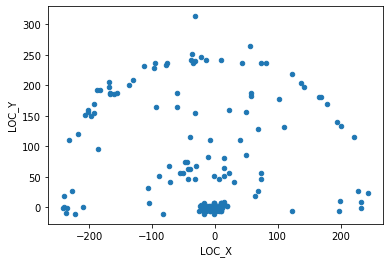

In [38]:
df_all_shots.plot('LOC_X', 'LOC_Y', kind='scatter')

In [39]:
home_team = df_shots.loc[0, 'HTM']
visitor_team = df_shots.loc[0, 'VTM']

In [40]:
home_team

'LAL'

In [41]:
full_home_team = abbr_map[home_team]
full_visitor_team = abbr_map[visitor_team]

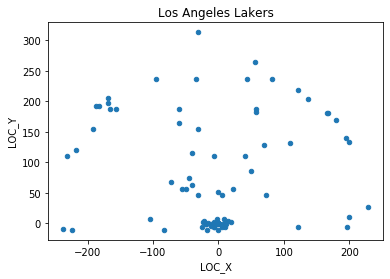

In [42]:
is_home = df_all_shots['TEAM_NAME'] == full_home_team
df_all_shots[is_home].plot('LOC_X', 'LOC_Y', kind='scatter', title=full_home_team);

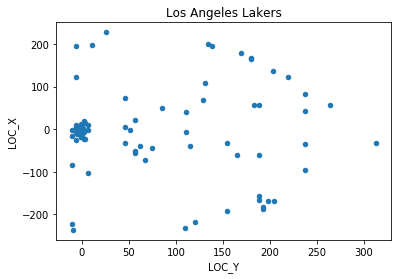

In [43]:
df_all_shots[is_home].plot('LOC_Y', 'LOC_X', kind='scatter', title=full_home_team);

In [44]:
hd = df_playbyplay['HOMEDESCRIPTION']
vd = df_playbyplay['VISITORDESCRIPTION']

In [45]:
event_id = df_playbyplay['EVENTNUM'].values
desc = np.where(hd, hd, vd)

In [46]:
df_event = pd.DataFrame({'GAME_EVENT_ID': event_id,
                        'DESCRIPTION': desc})
df_event.head()

,GAME_EVENT_ID,DESCRIPTION
0,0,None
1,1,Jump Ball Hibbert vs. Withey: Tip to Lyles
2,2,MISS Hayward 2' Layup
3,3,Randle REBOUND (Off:0 Def:1)
4,5,MISS Bryant 24' 3PT Jump Shot


In [47]:
df_all_shots_2 = df_all_shots.merge(df_event, how='left')
df_all_shots_2.head()

,GAME_EVENT_ID,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_TYPE,LOC_X,LOC_Y,SHOT_MADE_FLAG,POINTS,DESCRIPTION
0,2,Gordon Hayward,202330,Utah Jazz,1610612762,1,11,40,2PT Field Goal,-17.0,7.0,0,0,MISS Hayward 2' Layup
1,5,Kobe Bryant,977,Los Angeles Lakers,1610612747,1,11,25,3PT Field Goal,137.0,203.0,0,0,MISS Bryant 24' 3PT Jump Shot
2,8,Rodney Hood,203918,Utah Jazz,1610612762,1,11,12,2PT Field Goal,-11.0,82.0,0,0,MISS Hood 8' Pullup Jump Shot
3,10,Jeff Withey,203481,Utah Jazz,1610612762,1,10,59,2PT Field Goal,-43.0,46.0,1,2,Withey 6' Floating Jump Shot (2 PTS) (Mack 1 AST)
4,11,Kobe Bryant,977,Los Angeles Lakers,1610612747,1,10,44,2PT Field Goal,199.0,11.0,0,0,MISS Bryant 20' Jump Shot


In [48]:
df_all_shots_2['HOME_TEAM'] = (df_all_shots_2['TEAM_NAME'] == full_home_team).astype('int')
df_all_shots_2.head()

,GAME_EVENT_ID,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_TYPE,LOC_X,LOC_Y,SHOT_MADE_FLAG,POINTS,DESCRIPTION,HOME_TEAM
0,2,Gordon Hayward,202330,Utah Jazz,1610612762,1,11,40,2PT Field Goal,-17.0,7.0,0,0,MISS Hayward 2' Layup,0
1,5,Kobe Bryant,977,Los Angeles Lakers,1610612747,1,11,25,3PT Field Goal,137.0,203.0,0,0,MISS Bryant 24' 3PT Jump Shot,1
2,8,Rodney Hood,203918,Utah Jazz,1610612762,1,11,12,2PT Field Goal,-11.0,82.0,0,0,MISS Hood 8' Pullup Jump Shot,0
3,10,Jeff Withey,203481,Utah Jazz,1610612762,1,10,59,2PT Field Goal,-43.0,46.0,1,2,Withey 6' Floating Jump Shot (2 PTS) (Mack 1 AST),0
4,11,Kobe Bryant,977,Los Angeles Lakers,1610612747,1,10,44,2PT Field Goal,199.0,11.0,0,0,MISS Bryant 20' Jump Shot,1


In [49]:
is_home = df_all_shots_2['HOME_TEAM'] == 1
x = df_all_shots_2['LOC_Y'] + 40
x = np.where(is_home, x, 900 - x)

df_all_shots_2['LOC_X_NEW'] = x
df_all_shots_2['LOC_Y_NEW'] = df_all_shots_2['LOC_X']

# Create basketball court for visualization

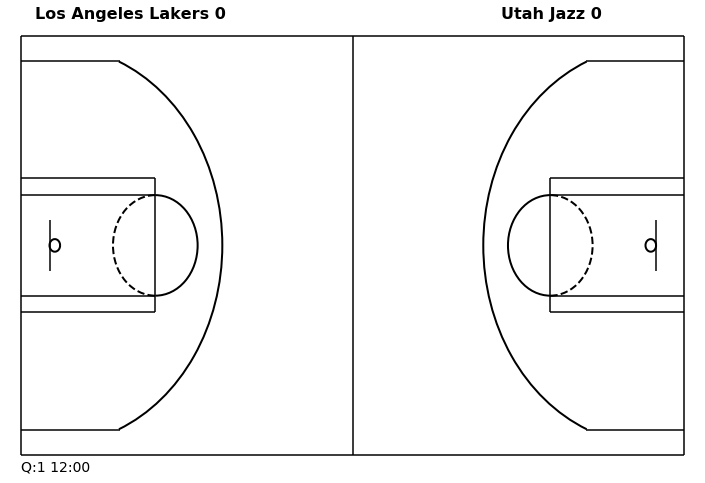

In [50]:
def create_court():
    # Set-up figure
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_axes([.2, .1, .6, .8], frame_on=False, xticks=[], yticks=[])
    
    # Draw the borders of the court
    ax.set_xlim(-20, 960)
    ax.vlines([0, 940], -250, 250)
    ax.hlines([-250, 250], 0, 940)
    ax.hlines([-80, -80, 80, 80], [0, 750] * 2, [190, 940] * 2)
    ax.hlines([-60, -60, 60, 60], [0, 750] * 2, [190, 940] * 2)
    ax.vlines([190, 750], -80, 80)
    ax.vlines(470, -250, 250)
    ax.vlines([40, 900], -30, 30)

    # Add the three point arc, free throw circle, midcourt circle and backboard and rim
    ax.add_patch(Arc((190, 0), 120, 120, theta1=-90, theta2=90, linewidth=2))
    ax.add_patch(Arc((190, 0), 120, 120, theta1=90, theta2=-90, linewidth=2, linestyle='dashed'))
    ax.add_patch(Arc((750, 0), 120, 120, theta1=90, theta2=-90, linewidth=2))
    ax.add_patch(Arc((750, 0), 120, 120, theta1=-90, theta2=90, linewidth=2, linestyle='dashed'))
    ax.hlines([-220, -220, 220, 220], [0, 800] * 2, [140, 940] * 2)
    ax.add_patch(Arc((47.5, 0), 475, 475, theta1=-67.5, theta2=67.5, linewidth=2))
    ax.add_patch(Arc((892.5, 0), 475, 475, theta1=112.5, theta2=-112.5, linewidth=2))
    ax.add_patch(Arc((47.5, 0), 15, 15, theta1=0, theta2=360, linewidth=2))
    ax.add_patch(Arc((892.5, 0), 15, 15, theta1=0, theta2=360, linewidth=2))
    ax.add_patch(Circle((470, 0), 60, facecolor='none', lw=2))
    
    # Assign to variables the plot items that will change after each iteration
    ax.text(20, 270, f"{full_home_team} 0" , 
            fontsize=16, fontweight='bold', label='home')
    ax.text(680, 270, f"{full_visitor_team} 0", 
            fontsize=16, fontweight='bold', label='visitor')
    ax.text(0, -270, "Q:1 12:00", fontsize= 14, label='time')
    ax.text(200, -270, "", fontsize=14, label='description')
    return fig, ax

fig, ax = create_court()


### Add shots data

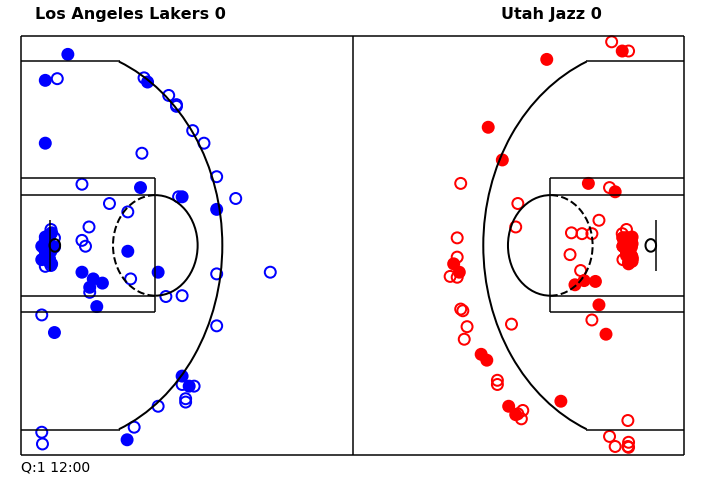

In [51]:
fig, ax = create_court()

missed = df_all_shots_2['SHOT_MADE_FLAG'] == 0
edgecolor = df_all_shots_2['HOME_TEAM'].replace({0: 'r', 1:'b'})
facecolor = edgecolor.copy()
facecolor[missed] = 'none' 

df_all_shots_2['FACECOLOR'] = facecolor
df_all_shots_2['EDGECOLOR'] = edgecolor
ax.scatter('LOC_X_NEW', 'LOC_Y_NEW', marker='o', s=120, facecolors='FACECOLOR',
           edgecolors='EDGECOLOR', lw=2, data=df_all_shots_2)

In [52]:
unique_players = df_all_shots_2[['TEAM_ID', 'PLAYER_ID']].drop_duplicates()
unique_players.head()

,TEAM_ID,PLAYER_ID
0,1610612762,202330
1,1610612747,977
2,1610612762,203918
3,1610612762,203481
5,1610612747,201579


## Get players images

In [53]:
base_image_url = "https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/"
year = 2016
player_image_data = {}
for _, row in unique_players.iterrows():
    team_id = row['TEAM_ID']
    player_id = row['PLAYER_ID']
    end_image_url = f"{team_id}/{year}/260x190/{player_id}.png"
    try:
        image_array = plt.imread(base_image_url + end_image_url)
    except:
        end_image_url = f"{team_id}/{year - 1}/260x190/{player_id}.png"
        image_array = plt.imread(base_image_url + end_image_url)
    if team_id not in player_image_data:
        player_image_data[team_id] = {player_id: image_array}
    else:
        player_image_data[team_id][player_id] = image_array

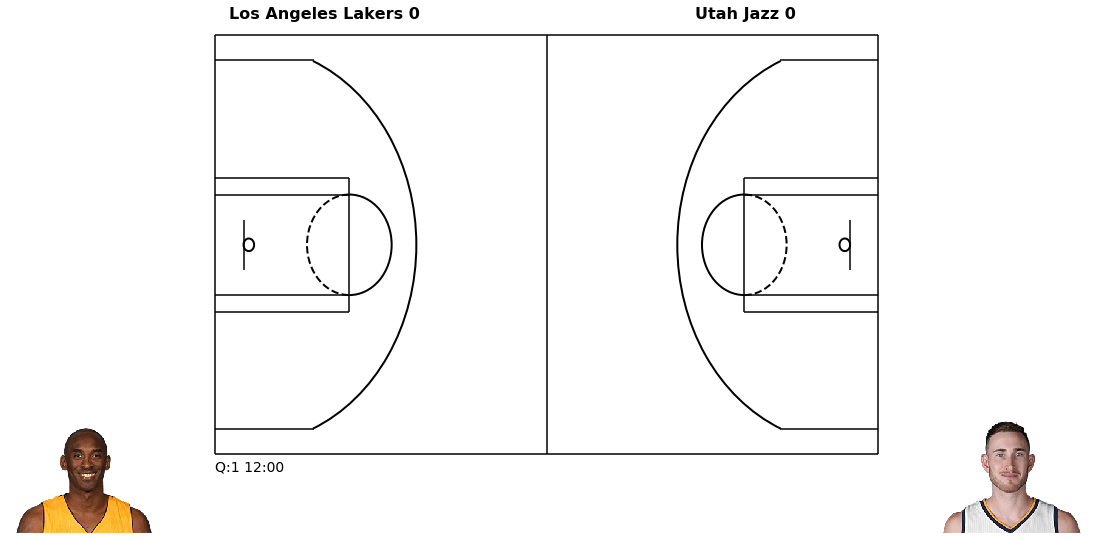

In [54]:
fig, ax = create_court()
ax_image_left = fig.add_axes((0, 0, .2, .2), zorder=-1, 
                             frame_on=False, xticks=[], yticks=[])
ax_image_right = fig.add_axes((.8, 0, .2, .2), zorder=-1, 
                              frame_on=False, xticks=[], yticks=[])

im_left = ax_image_left.imshow(player_image_data[1610612747][977])
im_right = ax_image_right.imshow(player_image_data[1610612762][202330])

## Create animation

<IPython.core.display.Javascript object>


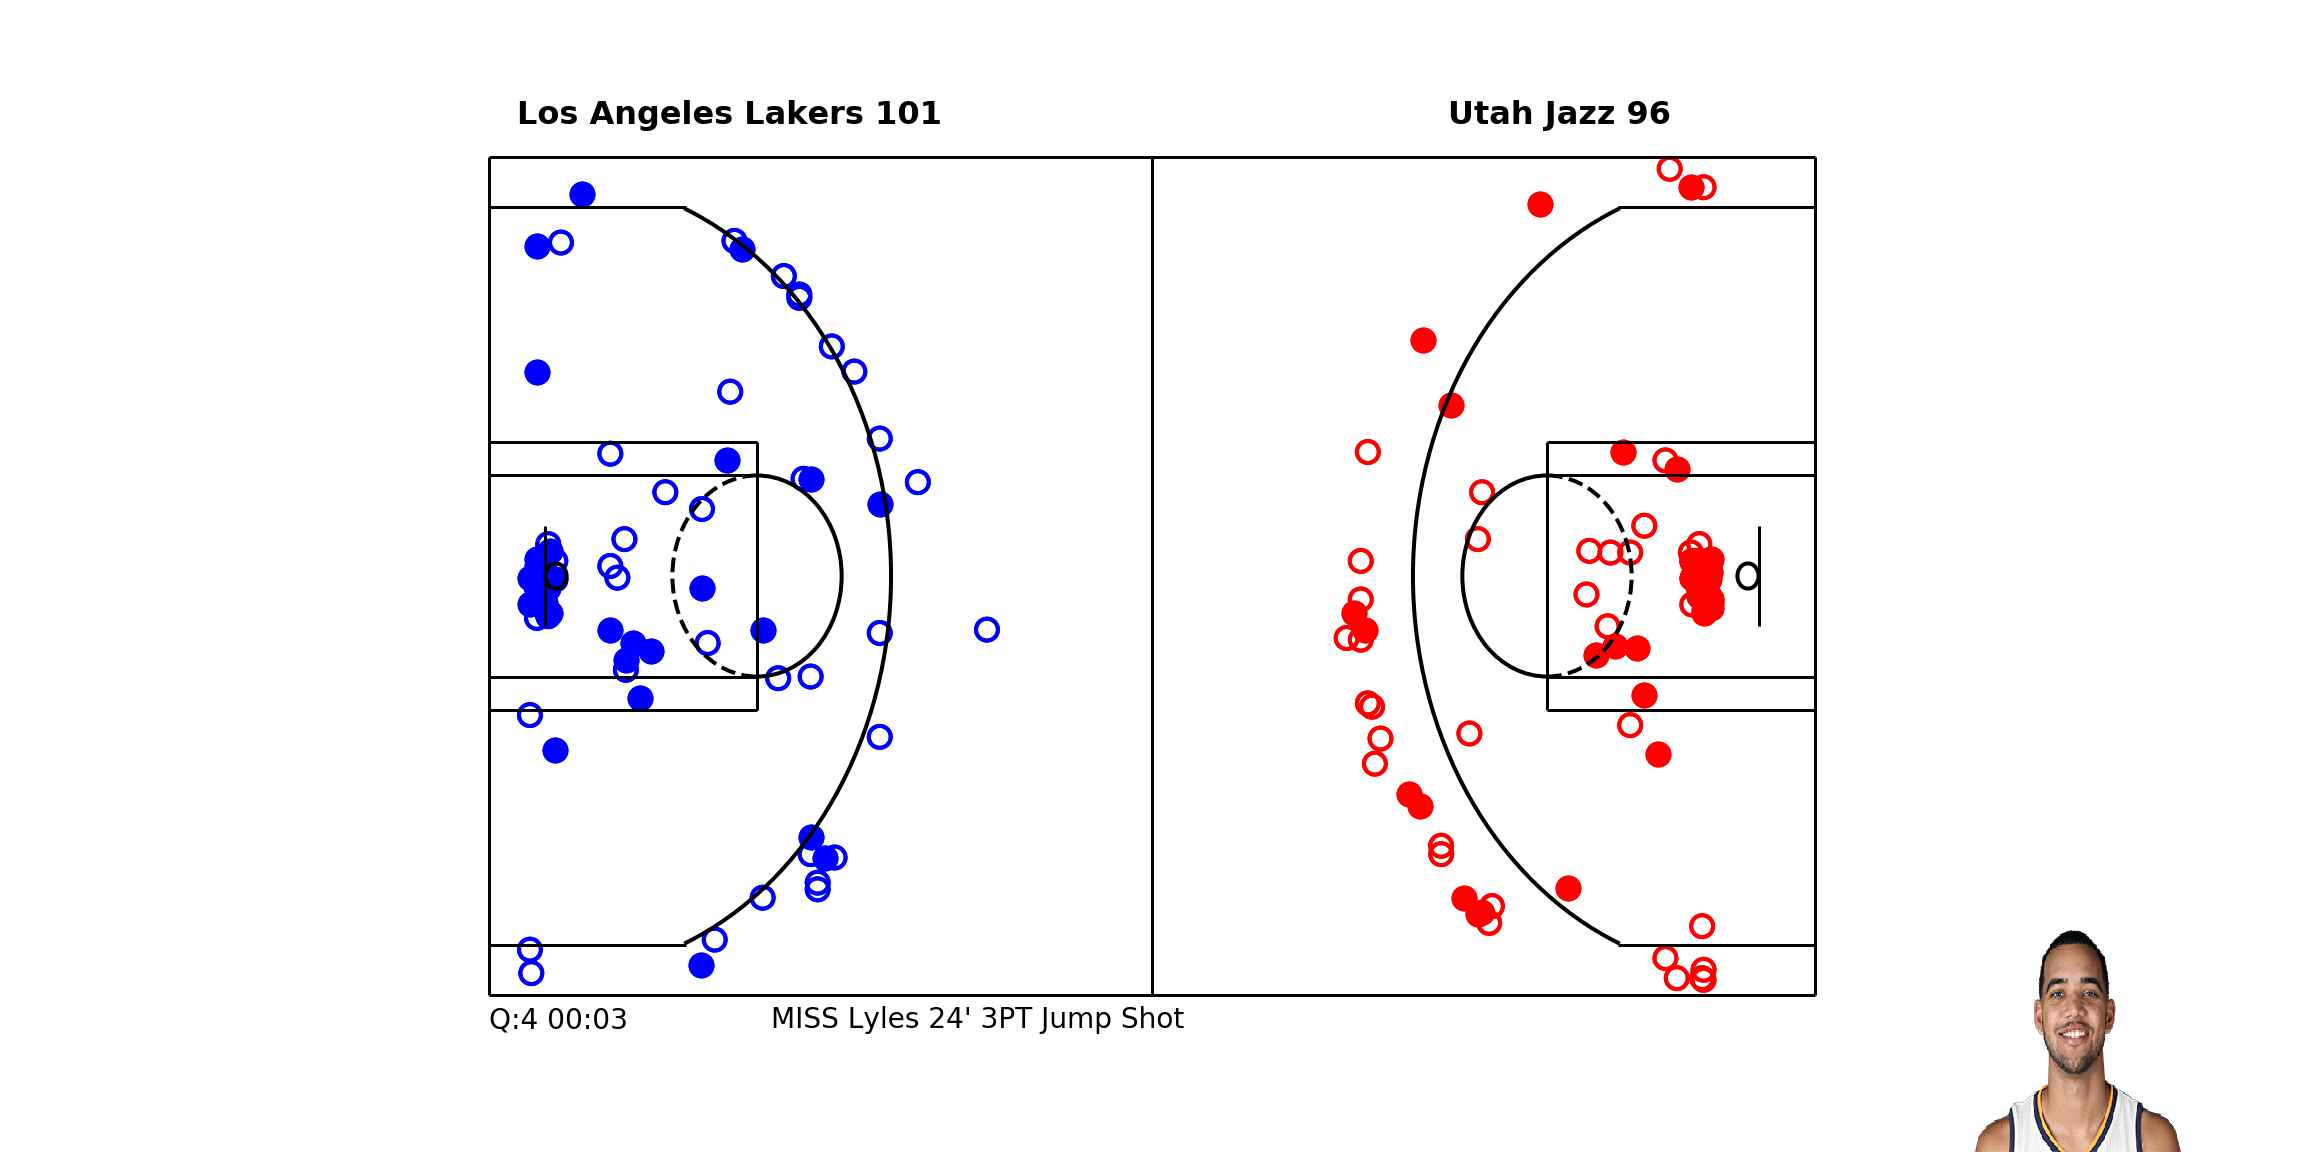

In [55]:
%matplotlib notebook
%matplotlib notebook
# Recreate the court
fig, ax = create_court()
ax_image_left = fig.add_axes((0, 0, .2, .2), zorder=-1, 
                             frame_on=False, xticks=[], yticks=[])
ax_image_right = fig.add_axes((.8, 0, .2, .2), zorder=-1, 
                              frame_on=False, xticks=[], yticks=[])
im_left = ax_image_left.imshow([[0]])
im_right = ax_image_right.imshow([[0]])
im_left.set_data([[]])
im_right.set_data([[]])


scores = {'visitor': 0, 'home': 0} 
texts = {t.get_label(): t for t in ax.texts}

def init():
    scores['home'] = 0
    scores['visitor'] = 0
    texts['home'].set_text(f"{full_home_team} {scores['home']}")
    texts['visitor'].set_text(f"{full_visitor_team} {scores['visitor']}")
    texts['time'].set_text("Q:1 12:00")               
    texts['description'].set_text("")
    im_left.set_data([[]])
    im_right.set_data([[]])
                              
# The update function is called as frequently as the interval parameter below (in milliseconds).
def update(frame_number):
    # Change the score
    if frame_number == 0:
        return
                              
    im_left.set_data([[]])
    im_right.set_data([[]])

    current_row = df_all_shots_2.iloc[frame_number - 1]
    ax.scatter('LOC_X_NEW', 'LOC_Y_NEW', marker='o', s=120,
                      facecolors='FACECOLOR', edgecolors='EDGECOLOR', 
                      lw=2, data=current_row);

    team_type = 'home' if current_row['HOME_TEAM'] == 1 else 'visitor'
    scores[team_type] += current_row['POINTS']
    texts['home'].set_text(f"{full_home_team} {scores['home']}")
    texts['visitor'].set_text(f"{full_visitor_team} {scores['visitor']}")
    
    per = current_row['PERIOD']
    mr = current_row['MINUTES_REMAINING']
    sr = current_row['SECONDS_REMAINING']
    texts['time'].set_text(f"Q:{per} {mr:02d}:{sr:02d}")               
    texts['description'].set_text(current_row['DESCRIPTION'])
                              
    team_id = current_row['TEAM_ID']
    player_id = current_row['PLAYER_ID']
    image_array = player_image_data[team_id][player_id]

    if team_type == 'home':
        im_left.set_data(image_array)
    else:
        im_right.set_data(image_array)

animation = FuncAnimation(fig, func=update, frames=len(df_all_shots_2) + 1, 
                          init_func=init, interval=10, repeat=False)

In [56]:
plt.rcParams['animation.writer']

'ffmpeg'

In [57]:
writers.list()

['pillow', 'ffmpeg', 'ffmpeg_file', 'avconv', 'avconv_file', 'html']

In [58]:
from matplotlib.animation import FFMpegWriter
writer = FFMpegWriter(fps=.75, bitrate=1800)
animation.save('kobe_lastgame_animation.mp4', writer=writer)